# ai4i2020 Data Visualization
- check characteristics of features and clases
- find correlation between features and classes
    - with histogram
    - corr()
    - scatter_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/My\ Drive/Colab\ Notebooks/summer_coop

/content/drive/My Drive/Colab Notebooks/summer_coop


# Visualize ai4i2020 data from UCI
- [detail of the data](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset#)

In [ ]:
import pandas as pd

data = pd.read_csv('ai4i2020/ai4i2020.csv')

In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


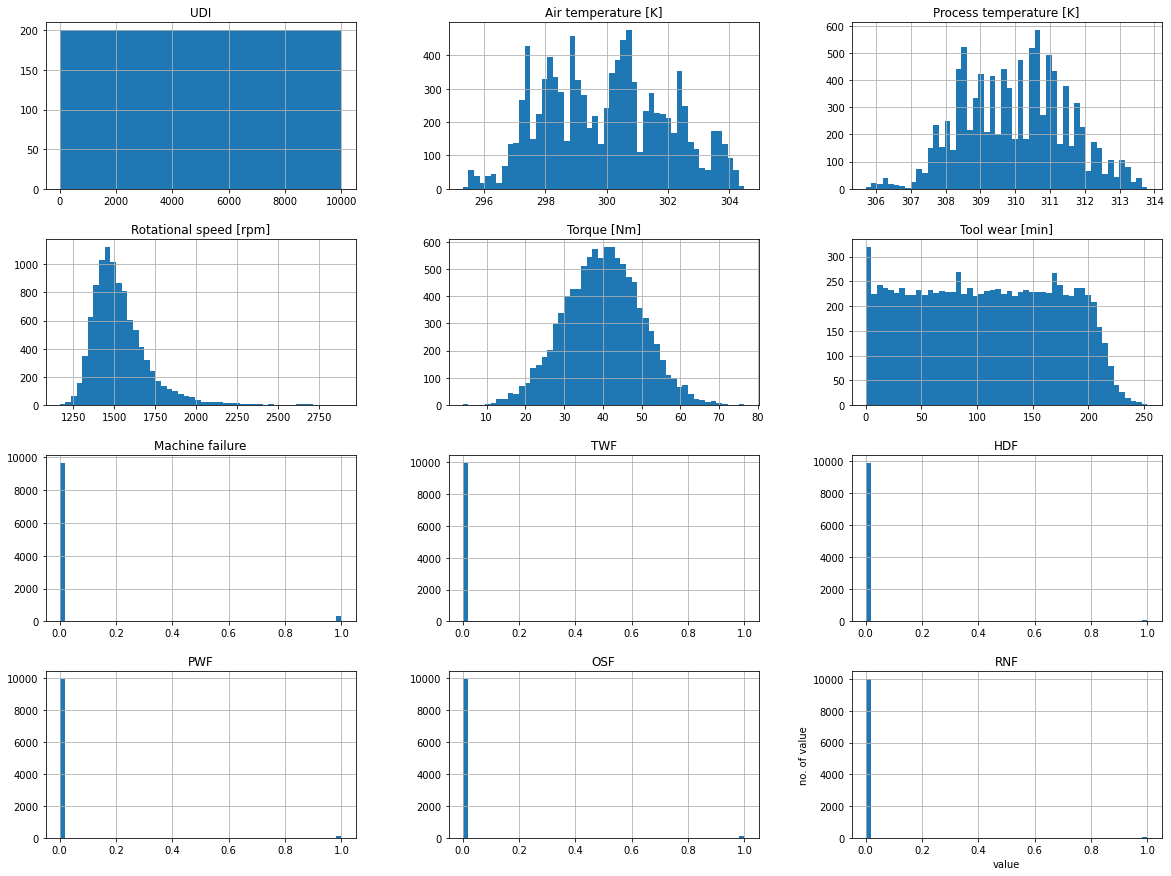

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20, 15))
plt.ylabel('no. of value')
plt.xlabel('value')
plt.show()

## No. of Failure
- Some failure occur simultaneously
    - Machine failure no : 339
    - Sum of all failure : 373 

In [ ]:
print('Machine failure: \t' + str(data['Machine failure'].sum()))
print('Tool Wear failure: \t' + str(data['TWF'].sum()))
print('Heat Dissipation failure: \t' + str(data['HDF'].sum()))
print('Power failure: \t' + str(data['PWF'].sum()))
print('Overstrain failure: \t' + str(data['OSF'].sum()))
print('Random failure: \t' + str(data['RNF'].sum()))
print('SUM: \t' + str(data['TWF'].sum() + data['HDF'].sum() + data['PWF'].sum() + data['OSF'].sum() + data['RNF'].sum()))

Machine failure: 	339
Tool Wear failure: 	46
Heat Dissipation failure: 	115
Power failure: 	95
Overstrain failure: 	98
Random failure: 	19
SUM: 	373


## Features versus Machine failure
- can find from where the failure usually occur
- 1: failure
- 0: normal
### Result
- Air temperature: near 302 K
- Process temerature: 310 ~ 312 K
- Rotational speed: under 1500 rpm
- Torque: 45 ~ 70 Nm
- Tool wear: uniformly distributed, concentrated near 200 ~ 250 min

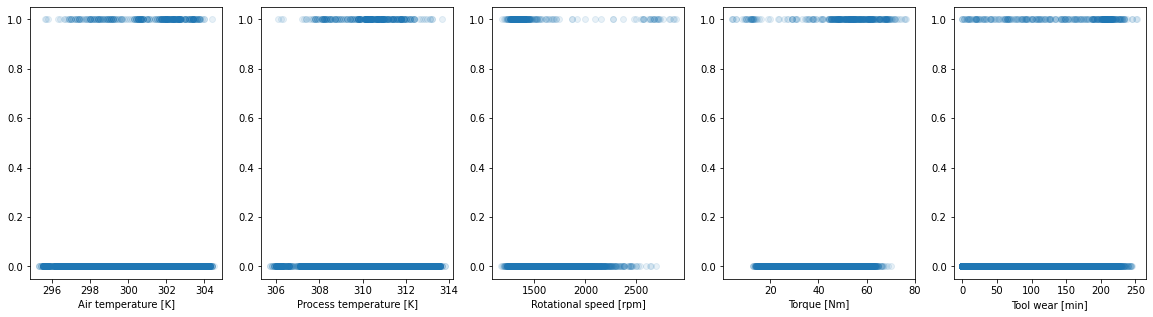

In [ ]:
fig, axs = plt.subplots(1, 5, figsize = (20, 5))
axs[0].scatter(x = data['Air temperature [K]'], y = data['Machine failure'], alpha = 0.1)
axs[0].set_xlabel('Air temperature [K]')
axs[1].scatter(x = data['Process temperature [K]'], y = data['Machine failure'], alpha = 0.1)
axs[1].set_xlabel('Process temperature [K]')
axs[2].scatter(x = data['Rotational speed [rpm]'], y = data['Machine failure'], alpha = 0.1)
axs[2].set_xlabel('Rotational speed [rpm]')
axs[3].scatter(x = data['Torque [Nm]'], y = data['Machine failure'], alpha = 0.1)
axs[3].set_xlabel('Torque [Nm]')
axs[4].scatter(x = data['Tool wear [min]'], y = data['Machine failure'], alpha = 0.1)
axs[4].set_xlabel('Tool wear [min]')

plt.show()

## Air temp versus Process temp
- distribution is similar

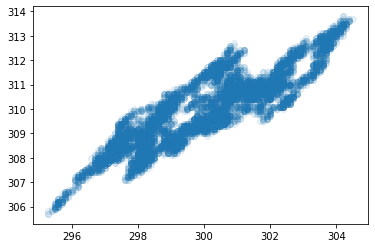

In [ ]:
plt.scatter(x = data['Air temperature [K]'], y = data['Process temperature [K]'], alpha= 0.1)

In [ ]:
data.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabea7e9990>,
      dtype=object)

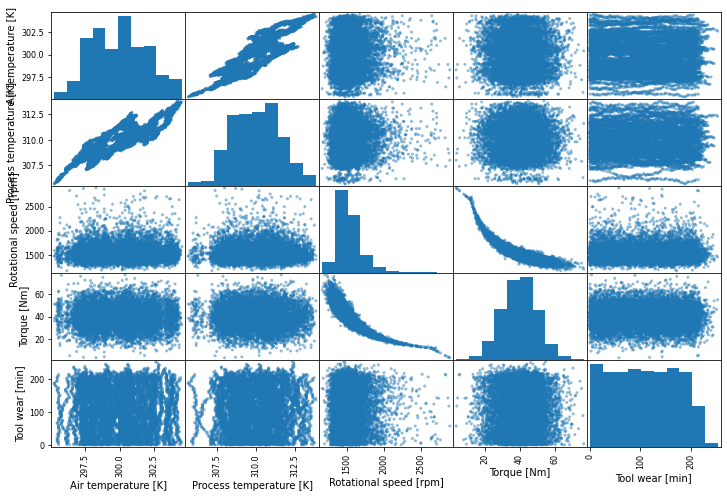

In [ ]:
from pandas.plotting import scatter_matrix
attri = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scatter_matrix(data[attri], figsize = (12, 8))